# Tai-Laun Mark

## Research question/interests

-I would like to analyze average wind speeds and direction to determine if renewable wind turbine energy would be effective and sustainable in the region where this data is collected. Reason for this question is to see if this particular renewable energy would be worth to try in this region to combat climate change and move away from fossil fuels. Inaddition, if wind turbines where installed, what direction should they face for maximize efficiency? What months would we see the most output and least?  Rainfall will also be examined to determine if this would be detrimental to the operation of any erected wind turbines.


In [ ]:
import numpy as np
import pandas as pd 
import project_functions1 as pf1
import seaborn as sns
import matplotlib.pyplot as plt
import project_functions2 as pf2
path = '../data/raw/climate_data.csv'
df_final = pf2.load_and_process(path)

In [ ]:
data_raw = pf1.update_column("../data/raw/climate_data.csv")
data_raw

,Date,avg_tem,avg_hum,avg_dew,avg_bar,avg_win,avg_gus,avg_dir,rfm,rfy,...,max_hum,min_hum,max_pre,min_pre,max_win,max_gus,max_hea,Date1,Month,dif_p
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,86.0,35.0,29.686,29.577,15.0,25.3,77.4,2020-07-24,7,0.109
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,90.0,36.0,29.781,29.645,8.1,17.3,77.5,2020-07-25,7,0.136
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,90.0,40.0,29.930,29.745,11.5,15.0,77.5,2020-07-26,7,0.185
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,96.0,35.0,29.941,29.781,13.8,18.4,78.2,2020-07-27,7,0.160


# Milestone 3

## Task 1- EDA

In [ ]:
data_raw.shape

(3902, 23)

In [ ]:
data_raw.head()

,Date,avg_tem,avg_hum,avg_dew,avg_bar,avg_win,avg_gus,avg_dir,rfm,rfy,...,max_hum,min_hum,max_pre,min_pre,max_win,max_gus,max_hea,Date1,Month,dif_p
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [ ]:
data_raw.describe()

,avg_tem,avg_hum,avg_dew,avg_bar,avg_win,avg_gus,avg_dir,rfm,rfy,max_rai,...,min_tem,max_hum,min_hum,max_pre,min_pre,max_win,max_gus,max_hea,Month,dif_p
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.0,...,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,44.670733,48.878011,23.127037,29.881420,5.758893,10.011968,216.037417,0.451105,5.486171,0.0,...,31.227524,73.673757,26.016914,30.045451,29.701622,19.840748,33.974910,58.086315,6.395695,0.343829
std,15.326793,17.438153,14.634088,0.250395,4.022485,14.117446,97.677761,0.603462,4.534444,0.0,...,14.124424,20.380611,15.623870,0.258140,0.451691,12.235410,38.632424,17.953453,3.430231,0.407499
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-27.700000,1.000000,0.000000,29.338000,13.266000,0.000000,0.000000,-6.100000,1.000000,0.000000
25%,33.700000,36.000000,12.100000,29.700000,2.700000,4.500000,116.000000,0.050000,0.980000,0.0,...,23.000000,63.000000,15.000000,29.866000,29.562000,13.800000,19.600000,43.900000,3.000000,0.220000
50%,45.100000,47.000000,22.500000,29.900000,4.600000,7.100000,253.000000,0.220000,5.080000,0.0,...,32.800000,81.000000,22.000000,30.016000,29.711000,18.400000,27.600000,57.200000,6.000000,0.293000
75%,58.000000,61.000000,35.400000,30.000000,8.000000,12.100000,282.000000,0.670000,9.047500,0.0,...,41.800000,89.000000,32.000000,30.203000,29.869000,24.200000,34.500000,77.300000,9.000000,0.395000
max,76.300000,94.000000,55.100000,31.000000,26.400000,240.400000,360.000000,4.480000,16.410000,0.0,...,65.700000,100.000000,90.000000,31.204000,30.855000,181.700000,255.300000,88.400000,12.000000,16.602000


In [ ]:
data_raw.nunique()

Date       3902
avg_tem     656
avg_hum      86
avg_dew     637
avg_bar      22
avg_win     206
avg_gus     332
avg_dir     328
rfm         234
rfy         799
max_rai       1
max_tem     680
min_tem     577
max_hum      92
min_hum      89
max_pre    1047
min_pre    1062
max_win      63
max_gus     104
max_hea     626
Date1      3902
Month        12
dif_p      1028
dtype: int64

In [ ]:
print("Columns are: {0}".format(list(data_raw.columns)), "\n")

Columns are: ['Date', 'avg_tem', 'avg_hum', 'avg_dew', 'avg_bar', 'avg_win', 'avg_gus', 'avg_dir', 'rfm', 'rfy', 'max_rai', 'max_tem', 'min_tem', 'max_hum', 'min_hum', 'max_pre', 'min_pre', 'max_win', 'max_gus', 'max_hea', 'Date1', 'Month', 'dif_p'] 



*Clearly a huge amount of different data is in this dataset that is not relevant to my research question and will be omitted in Task 2. Additionally there is redundant data or overly specific data such as "max_rai(Max rain per minute)", "rfm(Rainfall for month)", when there is "rfy(Rainfall per year)". "avg_gus(Average gustspeed)" is also overly specific as which I'll use "avg_win(Average windspeed)".*

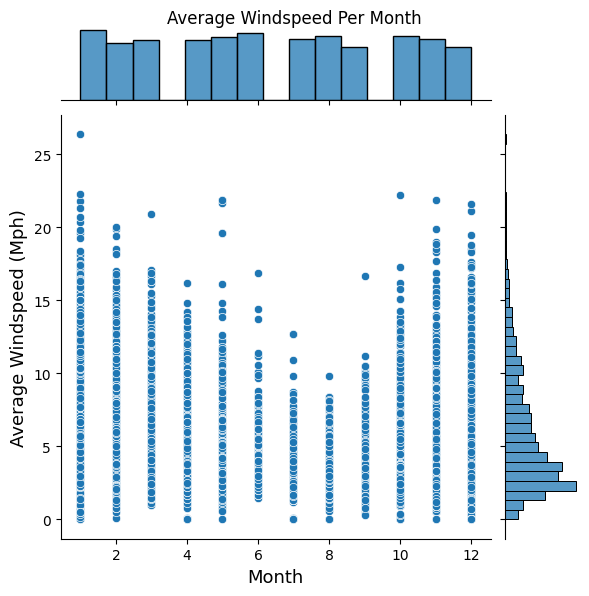

In [ ]:
h = sns.jointplot(x='Month',y='avg_win', data=data_raw)
h.set_axis_labels('Month','Average Windspeed (Mph)', fontsize=13)
h.fig.suptitle("Average Windspeed Per Month")
h.fig.subplots_adjust(top=0.95)

Here we see that the highest average windspeeds are in the months November, December, January, and February between 2009-2022. The highest recorded average windspeed was above 25 mph; more than suffient for a wind turbine to begin turning and generating electricity (miniumm of ~7mph-9 mph Hydroquebec.com and eia.gov (US Energy Info Admin).

*Here I'm looking to see in which months the max precipition is prevalent.This is important because rain can be detrimental to wind turbines as it can cause greater wear & tear on the turbine blades which would require costly repairs and replacements. Almost opposite of what we see from the windspeed graph, we see the opposite months, April- September, received the most rainfall. For reference, Kelowna received ~2.97 inches of rain in June 2022, the highest of all months this year (https://kelowna.weatherstats.ca/). This is good news as when windspeed averages are highest, preciprition won't hinder wind turbine use.*

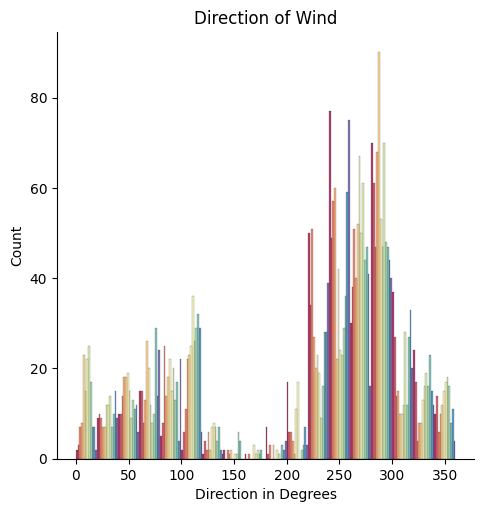

In [ ]:
b = sns.displot(data=data_raw, x='avg_dir',hue='Month', multiple='dodge', palette='Spectral').set(title='Direction of Wind',xlabel='Direction in Degrees')
b._legend.remove()

*I was interested in what directions wind turbines should face if installed in the area. There are two types: Upwind turbines that face into the wind (more common), and downwind turbines (rarer). Here we see that the peaks of wind direction come from one heading, between ~225 degrees - ~300 degrees. From these headings and the below compass image for reference, we can determine the best direction to place wind turbines would be facing a Westward direction for maximum harnessing of the winds.*



![compass.png](../images/compass.png)

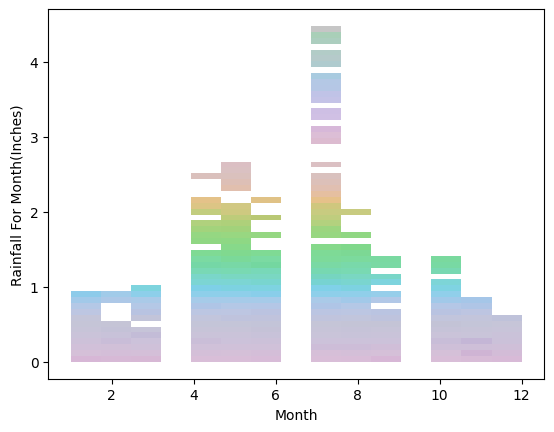

In [ ]:
a = sns.histplot(data=data_raw,x ='Month', y='rfm', hue='rfm',palette='cubehelix', legend=None, multiple='dodge').set(xlabel= 'Month', ylabel='Rainfall For Month(Inches)')

*Here I'm looking to see in which months the max precipition is prevalent.This is important because rain can be detrimental to wind turbines as it can cause greater wear & tear on the turbine blades which would require costly repairs and replacements. Almost opposite of what we see from the windspeed graph, we see the opposite months, April- September, received the most rainfall. For reference, Kelowna received ~2.97 inches of rain in June 2022, the highest of all months this year (https://kelowna.weatherstats.ca/). This is good news as when windspeed averages are highest, preciprition won't hinder wind turbine use.*

## Task 2

In [ ]:
reset -f

In [ ]:
import numpy as np
import pandas as pd 
import project_functions1 as pf1
import seaborn as sns
import matplotlib.pyplot as plt

*I will now begin removing redudant data as previously stated as it does not apply to my research questions. As I'm primarly only concerned with things related to wind, gust, direction of wind, and rainfall per month. I will make a new dataframe with just those columns. Renaming of the long column names had already been previously done with function (pf1.update_column).*


In [ ]:
df1 = pf1.update_column("../data/raw/climate_data.csv")
df1

,Date,avg_tem,avg_hum,avg_dew,avg_bar,avg_win,avg_gus,avg_dir,rfm,rfy,...,max_hum,min_hum,max_pre,min_pre,max_win,max_gus,max_hea,Date1,Month,dif_p
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,86.0,35.0,29.686,29.577,15.0,25.3,77.4,2020-07-24,7,0.109
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,90.0,36.0,29.781,29.645,8.1,17.3,77.5,2020-07-25,7,0.136
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,90.0,40.0,29.930,29.745,11.5,15.0,77.5,2020-07-26,7,0.185
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,96.0,35.0,29.941,29.781,13.8,18.4,78.2,2020-07-27,7,0.160


In [ ]:
dfcleaned= df1.drop(['Date','avg_tem','avg_hum','avg_dew','avg_bar','rfy','max_hum','min_hum','max_pre','min_pre','max_win','max_gus','max_hea','Date1','dif_p','max_rai','max_tem','min_tem'], axis=1)
dfcleaned

,avg_win,avg_gus,avg_dir,rfm,Month
0,26.4,36.8,274.0,0.00,1
1,12.8,18.0,240.0,0.00,1
2,8.3,12.2,290.0,0.00,1
3,2.9,4.5,47.0,0.00,1
4,16.7,23.1,265.0,0.00,1
...,...,...,...,...,...
3897,3.6,5.8,240.0,0.24,7
3898,2.5,4.0,242.0,0.33,7
3899,1.7,2.9,357.0,0.33,7
3900,2.2,4.0,66.0,0.33,7


*As planned...*

In [ ]:
avg_by_mnth = dfcleaned.groupby(by='Month').mean()
avg_by_mnth

,avg_win,avg_gus,avg_dir,rfm
Month,,,,
1,8.186992,12.121138,243.075881,0.087669
2,8.037294,11.868647,236.135314,0.157063
3,6.853774,10.195283,215.908805,0.239340
4,5.726480,8.599377,216.766355,0.515670
5,4.794065,11.974777,202.418398,1.019852
6,4.394958,7.525490,204.464986,0.524930
7,3.625767,7.327607,199.788344,1.171656
8,3.467155,5.549267,215.627566,0.557889
9,3.896466,13.804947,209.530035,0.286431


*Above I group by month to show the months average for the average wind, average gustspeed, average direction, and average rainfall per month over the data collection years.*

In [ ]:
dfcleaned.head()

,avg_win,avg_gus,avg_dir,rfm,Month
0,26.4,36.8,274.0,0.0,1
1,12.8,18.0,240.0,0.0,1
2,8.3,12.2,290.0,0.0,1
3,2.9,4.5,47.0,0.0,1
4,16.7,23.1,265.0,0.0,1


In [ ]:
dfcleaned[['aag','aaw','aar','aad']] = dfcleaned.apply(lambda x: avg_by_mnth.iloc[int(x.Month)-1][['avg_gus','avg_win','rfm','avg_dir']], axis=1)
dfcleaned

,avg_win,avg_gus,avg_dir,rfm,Month,aag,aaw,aar,aad
0,26.4,36.8,274.0,0.00,1,12.121138,8.186992,0.087669,243.075881
1,12.8,18.0,240.0,0.00,1,12.121138,8.186992,0.087669,243.075881
2,8.3,12.2,290.0,0.00,1,12.121138,8.186992,0.087669,243.075881
3,2.9,4.5,47.0,0.00,1,12.121138,8.186992,0.087669,243.075881
4,16.7,23.1,265.0,0.00,1,12.121138,8.186992,0.087669,243.075881
...,...,...,...,...,...,...,...,...,...
3897,3.6,5.8,240.0,0.24,7,7.327607,3.625767,1.171656,199.788344
3898,2.5,4.0,242.0,0.33,7,7.327607,3.625767,1.171656,199.788344
3899,1.7,2.9,357.0,0.33,7,7.327607,3.625767,1.171656,199.788344
3900,2.2,4.0,66.0,0.33,7,7.327607,3.625767,1.171656,199.788344


## Task 3

*I will now transfer the steps I performed in Task 2 to into a .py file.*

In [ ]:
reset -f

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions2 as pf2

In [ ]:
path = '../data/raw/climate_data.csv'

In [ ]:
df_final = pf2.load_and_process(path)
df_final

,avg_win,avg_gus,avg_dir,rfm,Month,aag,aaw,aar,aad
0,26.4,36.8,274.0,0.00,1,12.121138,8.186992,0.087669,243.075881
1,12.8,18.0,240.0,0.00,1,12.121138,8.186992,0.087669,243.075881
2,8.3,12.2,290.0,0.00,1,12.121138,8.186992,0.087669,243.075881
3,2.9,4.5,47.0,0.00,1,12.121138,8.186992,0.087669,243.075881
4,16.7,23.1,265.0,0.00,1,12.121138,8.186992,0.087669,243.075881
...,...,...,...,...,...,...,...,...,...
3897,3.6,5.8,240.0,0.24,7,7.327607,3.625767,1.171656,199.788344
3898,2.5,4.0,242.0,0.33,7,7.327607,3.625767,1.171656,199.788344
3899,1.7,2.9,357.0,0.33,7,7.327607,3.625767,1.171656,199.788344
3900,2.2,4.0,66.0,0.33,7,7.327607,3.625767,1.171656,199.788344


*All done~*

In [ ]:
df_final.to_csv("../data/processed/prodata_2.csv")

Processed data ready for use in Tableau.

# Task 4: Data Analysis 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions2 as pf2
import project_functions1 as pf1

In [ ]:
data_raw = pf1.update_column("../data/raw/climate_data.csv")
df1 = pf1.update_column("../data/raw/climate_data.csv")
dfcleaned= df1.drop(['Date','avg_tem','avg_hum','avg_dew','avg_bar','rfy','max_hum','min_hum','max_pre','min_pre','max_win','max_gus','max_hea','Date1','dif_p','max_rai','max_tem','min_tem'], axis=1)
avg_by_mnth = dfcleaned.groupby(by='Month').mean()

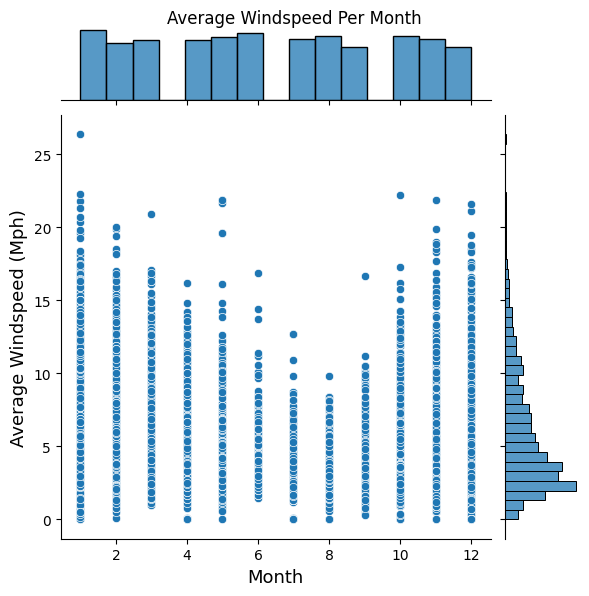

In [ ]:
h = sns.jointplot(x='Month',y='avg_win', data=data_raw)
h.set_axis_labels('Month','Average Windspeed (Mph)', fontsize=13)
h.fig.suptitle("Average Windspeed Per Month")
h.fig.subplots_adjust(top=0.95)

## Figure 1
*First I'd like to investigate what the varience of windspeeds are by month. Here we see that the highest average windspeeds are in the months November, December, January, and February between 2009-2022. The highest recorded average windspeed was above 25 mph; more than suffient for a wind turbine to begin turning and generating electricity (miniumm of ~7mph-9 mph Hydroquebec.com and eia.gov (US Energy Info Admin). The month that experienced the lowest average windspeeds are the months June -September. However, we also see the distribution of the data is skewed towards the lower end of the the plot with the greatest concentration around only ~4mph. To make this clearer, I decided an additional plot is needed to create a plot with distribution of the data as the focus.*
___

<matplotlib.legend.Legend>

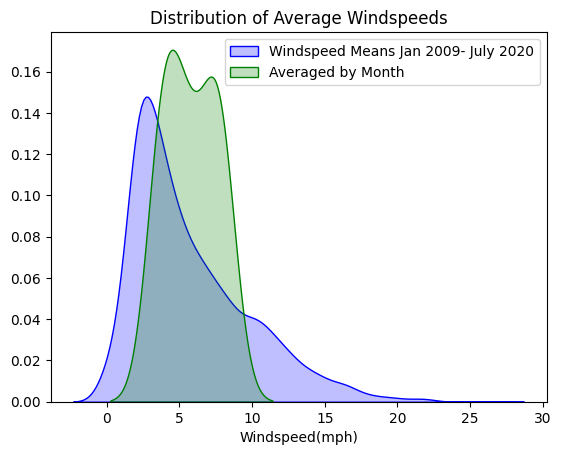

In [ ]:
sns.kdeplot(df_final['avg_win'], fill=True, color = 'Blue', label = 'Windspeed Means Jan 2009- July 2020').set(ylabel=None, xlabel='Windspeed(mph)')
sns.kdeplot(avg_by_mnth['avg_win'], fill= True, color = 'Green', label ='Averaged by Month').set(title='Distribution of Average Windspeeds', ylabel=None, xlabel='Windspeed(mph)')
plt.legend()

## Figure 2
*Shown in purple, the distribtion curve of averages from the same data used above confirms that it is as expected... the greatest distribution is below ~4mph. This may be detrimental to establishing wind turbines in this area as the minimum speed to generate electricity is ~7mph-9mph as stated previously. There appears to be some data indicating speeds of up to ~28 mph but thos are clearer outliners. However, lets look at the mean of all the averages over the month over the data collection years (or in other words, averages of the averages of the months).
Shown in green, this distribution curve looks a lot more promising! Here we can see that although the greatest density of recorded average windspeed is still ~4mph, we see that there is a second peak of distributions around ~8mph... sufficient to run a wind turbine.*
___

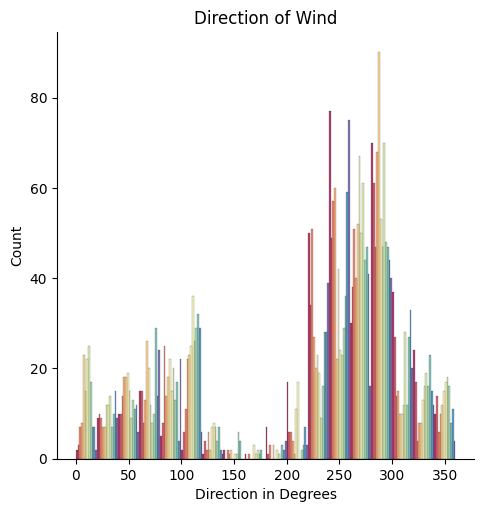

In [ ]:
b = sns.displot(data=data_raw, x='avg_dir',hue='Month', multiple='dodge', palette='Spectral').set(title='Direction of Wind',xlabel='Direction in Degrees')
b._legend.remove()

<img src="../images/compass.png" alt="drawing" style="width:500px;"/>

## Figure 3
*I was interested in what directions wind turbines should face if installed in the area. This is because there are two types of horizontal axis wind turbines: Upwind turbines that face into the wind (more common), and downwind turbines (rarer). To achieve optimal conditions, the rotor should be perpendicular to the wind direction(dtu.dk),  Here we see that the first cluster of wind direction come from heads between ~225 degrees to ~300 degrees. The second cluster we see (although significantly less prevelent that the first cluster) is at group between ~50 degrees to 125 degrees. The largest count from a wind direction is at ~285 degrees, while the least wind came from a ~165 degree direction. From these headings and the below compass image for reference, we can determine infer that the most of the wind comes from a westward direction blowing through to the east.*
___

[Text(0.5, 1.0, 'Rainfall Average By Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Rainfall (Inches)')]

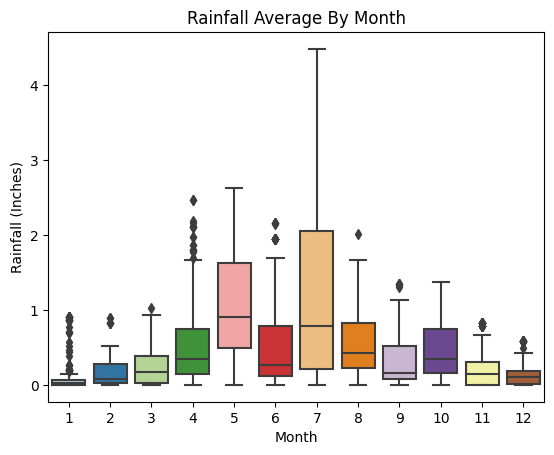

In [ ]:
sns.boxplot(data=dfcleaned,x='Month',y='rfm',palette='Paired').set(title='Rainfall Average By Month', xlabel= 'Month', ylabel='Rainfall (Inches)')

## Figure 4
*Originally a histplot was used to depict this data, I determined that a boxplot was more accurate in protraying the data that was applicable in a more effective way.Here I'm looking to see in which months the most rainfall is recieved to determine if this would impact wind turbine effectiveness.This is important because rain can be detrimental to wind turbines as it can cause greater wear & tear on the turbine blades which would require costly repairs and replacements (https://link.springer.com/article/10.1007/s40735-021-00472-0). If high winds and rainfall are are seen in similar months then that could hinder the operation of wind turbines. Fortunetly it seems the most rainfall is in the months May and July with all averages all below ~1 in of rain for every month. However, it appears there are some instances rainfall is beyond ~1in, most notably in April thru August with August having experienced up to ~4.25in of rain. Luckily these months are  almost opposite of what we see from when wind speeds are highest and therefore should not affect wind turbine operations in conjunction. For reference, Kelowna received ~2.97 inches of rain in June 2022, the highest of all months this year (https://kelowna.weatherstats.ca/).*
___

## Results and Conclusion

**I created three different visualizations to examine whether renewable wind turbine energy would be viable in Estes Park, Colorado. Currently, it's likely Etes Park recieves their energy mainly from two surrounding hydroelectric power plants (Estes Powerplant and Marys Lake Powerplant). While hydroelectricity is considered renewable, there is substantial trade-off in which they disrupt the nature environment and harm the migration of fishes. Additionally, Colorado itself was the seventh-largest natural gas-producing state in 2021. Luckily, wind power already accounted for almost four-fifths of the states renewable energy in 2021 (www.eia.gov/). Therefore by examination of weather data collected between January 2009 and July 2020 in Estes Park, I chose to investigate whether wind turbines would be effective in this area, what direction should they face if wind turbines are installed, and if rainfall would affect the operation of the wind turbines.**

**From Fig. 1 and Fig. 2 I determined that the average windspeed of ~8mph by month experienced by Estes Park was sufficent to sustain wind turbines. However, I also conclude that the average may not justify the costs of installation and operations of wind turbines as the output would be only minimal. From Fig. 3 it was observed that the wind direction came mainly from a westward direction and therefore if wind turbines were installed, they should be facing west for optimal energy production. Fig 3. shows that rainfall in the region is not relatively high to Kelowna and the most rainfall were in months outside of when average windspeed was highest and therefore would not interfer with wind turbine operation. In conclusion, as the world experiences increasing global climate change from fossil fuels and other other non-renewable energy sources, Etes Park, Colorado *may* benefit from hosting wind turbines to suppliment their current hydroelectricity and perhaps sell surplus energy to other regions to combat climate change.**